In [24]:
from tensorflow import kera
(x_train,y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

## 2(b)

In [25]:
import numpy as np

index1 = np.where(y_train.flatten() == 2)
x_train_bird = x_train[index1]
y_train_bird = y_train[index1]

index2 = np.where(y_test.flatten() == 2)
x_test_bird = x_test[index2]
y_test_bird = y_test[index2]

x_bird = np.concatenate((x_train_bird, x_test_bird))
y_bird = np.concatenate((y_train_bird, y_test_bird))
x_bird.shape

(6000, 32, 32, 3)

## 2(c)

In [5]:
pixels = x_bird.reshape(6000*32*32,3)
pixels.shape

(6144000, 3)

## 2(d)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1).fit(pixels)
cluster_centers = kmeans.cluster_centers_
cluster_centers_0 = cluster_centers[0]
cluster_centers_1 = cluster_centers[1]
cluster_centers_2 = cluster_centers[2]
cluster_centers_3 = cluster_centers[3]
color_class = [[0,0,128], [230, 25, 75], [170, 255, 195], [255, 255, 255]]

In [31]:
x_bird_shape = x_bird.reshape(-1, 3)
min_list = []
for i in range(len(x_bird)):
  min_list = []
  distance0 = np.linalg.norm(x_bird_shape[i]-cluster_centers_0)
  distance1 = np.linalg.norm(x_bird_shape[i]-cluster_centers_1)
  distance2 = np.linalg.norm(x_bird_shape[i]-cluster_centers_2)
  distance3 = np.linalg.norm(x_bird_shape[i]-cluster_centers_3)
  min_list.append(distance0)
  min_list.append(distance1)
  min_list.append(distance2)
  min_list.append(distance3)
  index = min_list.index(min(min_list))
  x_bird_shape[i]=color_class[index]

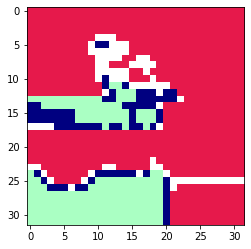

In [35]:
import matplotlib.pyplot as plt
x_bird_shape = x_bird_shape.reshape((6000, 32, 32, 3))
plt.imshow(x_bird_shape[1])

## 2(e)

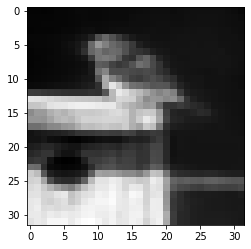

In [143]:
from skimage.color import rgb2gray
orig_img = x_bird[1]
grayscale_img = rgb2gray(orig_img)

plt.imshow(grayscale_img, cmap=plt.cm.gray)
plt.show()

## 2(f)

In [118]:
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Reshape

model = Sequential()
model.add(Conv2D(64,(5,5), input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32, activation='softmax'))
model.add(Conv2D(32, (5,5), input_shape=(32,32,1)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Reshape((32,32,4)))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

train_pri= []
test_pri = []
for i in x_train_bird: 
  train_pri.append(kmeans.predict(i.reshape(1024,3)).astype((np.uint8())))
for i in x_test_bird:
  test_pri.append(kmeans.predict(i.reshape(1024,3)).astype((np.uint8())))
train_pri = np_utils.to_categorical(train_pri)
test_pri = np_utils.to_categorical(test_pri)

x_bird_train = rgb2gray(x_train_bird).reshape(5000,32,32,1)
y_bird_train = train_pri.reshape(-1,32,32,4)
x_bird_test = rgb2gray(x_test_bird).reshape(1000,32,32,1)
y_bird_test = test_pri.reshape(-1,32,32,4)

CNN = model.fit(x_bird_train, y_bird_train, validation_split=0.1, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
36/36 [==============================] - 13s 356ms/step - loss: 1.3662 - val_loss: 1.3551
Epoch 2/30
36/36 [==============================] - 13s 353ms/step - loss: 1.3168 - val_loss: 1.2229
Epoch 3/30
36/36 [==============================] - 13s 352ms/step - loss: 1.1304 - val_loss: 1.0614
Epoch 4/30
36/36 [==============================] - 13s 352ms/step - loss: 1.0063 - val_loss: 0.9527
Epoch 5/30
36/36 [==============================] - 13s 350ms/step - loss: 0.8990 - val_loss: 0.8573
Epoch 6/30
36/36 [==============================] - 13s 351ms/step - loss: 0.8308 - val_loss: 0.8089
Epoch 7/30
36/36 [==============================] - 13s 351ms/step - loss: 0.7840 - val_loss: 0.7705
Epoch 8/30
36/36 [==============================] - 13s 351ms/step - loss: 0.7556 - val_loss: 0.7487
Epoch 9/30
36/36 [==============================] - 13s 351ms/step - loss: 0.7368 - val_loss: 0.7349
Epoch 10/30
36/36 [==============================] - 13s 351ms/step - loss: 0.7202 - val_lo

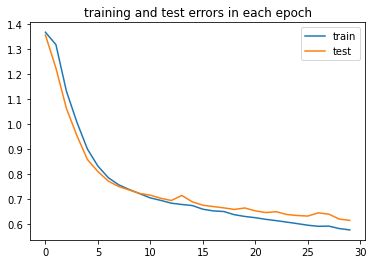

In [119]:
train_loss = CNN.history['loss']
test_loss = CNN.history['val_loss']
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('training and test errors in each epoch')
plt.legend(['train', 'test'])
plt.show()

In [124]:
train_error = model.evaluate(x_bird_train, y_bird_train, verbose=1)
test_error = model.evaluate(x_bird_test, y_bird_test, verbose=1)
print(f'train errors is:', train_error)
print(f'test errors is:', test_error)

train errors is: 0.5621877908706665
test errors is: 0.6215993762016296


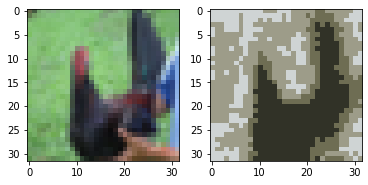

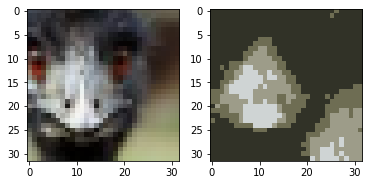

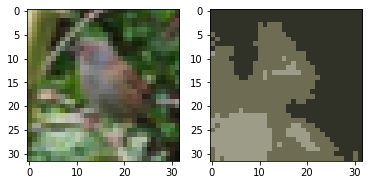

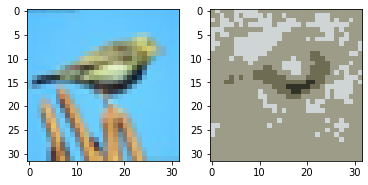

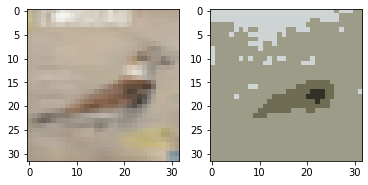

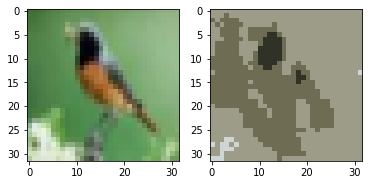

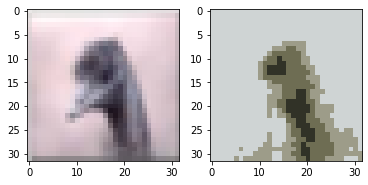

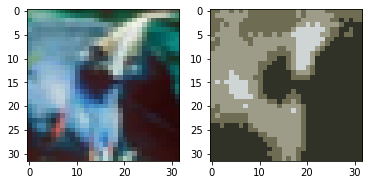

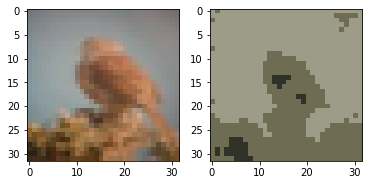

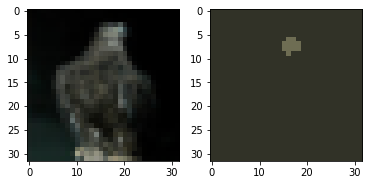

In [180]:
pre_pic = np.argmax(model.predict(x_bird_test), axis=3)
cluster = kmeans.cluster_centers_.astype(np.uint8())
pre_pic = cluster[pre_pic]
for i in range(10):
  figure, ax = plt.subplots(1,2)
  ax[0].imshow(x_test_bird[i])
  ax[1].imshow(pre_pic[i])
  plt.show()